In [47]:
import geopandas
import pandas as pd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

In [48]:
# Read the data in from the .csv file, show some basic information about the data
df = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250221.csv')
df.head(20)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)


In [49]:
## Discover some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

### Details on the dataset
Each row in the dataset is an individual squirrel, sighted somewhere in New York City's Central Park.

Here is a quick description of some of the columns in this dataset: 
- X: Longitude of the squirrel sighting
- Y: Latitude of the squirrel sighting
- Unique Squirrel ID: A unique identifier made up of some other columns. This is a unique identifier for the particular sighting, not a unique identifier for the squirrel itself. 
- Hectare: The space on the Central Park grid where the squirrel was sighted
- Shift: Whether the squirrel was sighted on the AM or PM shift. 
- Date: The date (in string format) which the squirrel was sighted
- Hectare Squirrel Number: Number within the chronological sequence of squirrel sightings for a discrete sighting session. 
- Age: Either Adult or Juvenile, showing the Age that the squirrel is
- Primary Fur Color: The color that the squirrel is primarily
- Highlight Cur Color: A string with 0+ additional colors for the squirrel
- Color Notes: Any additional information about the color of the squirrel
- Location: Whether the Squirrel was seen Above Ground or on the Ground Plane
- Above Ground Sighter Measurement: How far off the ground the squirrel was seen
- Specific Location: An optional string showing any additional notes about the squirrel's sighting location
- Running: Whether the squirrel was running when seen
- Chasing: Whether the squirrel was seen chasing another squirrel when sighted
- Climbing: Whether the squirrel was seen climbing when sighted
- Eating: Whether the squirrel was seen eating when sighted
- Foraging: Whether the squirrel was seen foraging when sighted
- Other Activities: An optional string indicating any other activities the squirrel was doing when sighted
- Kuks: Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons.
- Quaas: Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog.
- Moans: Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk.
- Tail flags: Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air.
- Tail twitches: Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity.
- Approaches: Squirrel was seen approaching human, seeking food.
- Indifferent: Squirrel was indifferent to human presence.
- Runs from: Squirrel was seen running from humans, seeing them as a threat.
- Other Interactions: Sighter notes on other types of interactions between squirrels and humans.
- Lat/Long: unneeded point, to be dropped from dataset

In [50]:
df = df.drop('Lat/Long', axis=1)

### Column Details - Null Values

In the dataset, there are 3023 total records. For the following fields, there are no Null-values and nothing needs to be done to care for the fact of Null values in those columns. 
- X, Y, Unique Squirrel ID, Hectare, Shift, Date, Hectare Squirrel Number, Combination of Primary and Highlight Color, Running, Chasing, Climbing, Eating, Foraging, Kuks, Quaas, Moans, Tail Flags, Tail Twitches, Approaches, Indifferent, Runs from

The following columns are optional data records, so Null values are permissible: 
- Highlight Fur Color, Color Notes, Specific Location, Other Activities, Other Interactions

The following columns have Null-values in the dataset, and it is necessary to deal with those Null values for proper analysis
- Age, Primary Fur Color, Location, Above Ground Sighter Measurement


In [51]:
# Work with Primary Fur Color, discover how the values are distributed
print(f'Number of null values: {df['Primary Fur Color'].isna().sum()}')
df['Primary Fur Color'].value_counts()

Number of null values: 55


Primary Fur Color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64

In [52]:
# Because most of the squirrels in our dataset are Gray, take all 55 squirrels with a color of Null, and make them have the color gray instead
df['Primary Fur Color'] = df['Primary Fur Color'].fillna('Gray')
print(f'Number of null values: {df['Primary Fur Color'].isna().sum()}')
df['Primary Fur Color'].value_counts()

Number of null values: 0


Primary Fur Color
Gray        2528
Cinnamon     392
Black        103
Name: count, dtype: int64

In [53]:
# Work with Age, discover how the values are distributed
print(f'Number of null values: {df['Age'].isna().sum()}')
df['Age'].value_counts()

Number of null values: 121


Age
Adult       2568
Juvenile     330
?              4
Name: count, dtype: int64

In [54]:
# turn all values that are equal to "?" to NaN.
df['Age'] = df['Age'].replace({'?': np.nan})

In [55]:
# Since most Squirrels are Adults, fill NaN squirrels for Age with the value "Adult"
df['Age'] = df['Age'].fillna('Adult')
print(f'Number of null values: {df['Age'].isna().sum()}')
df['Age'].value_counts()

Number of null values: 0


Age
Adult       2693
Juvenile     330
Name: count, dtype: int64

In [56]:
# Work with Location to discover what to do about Null values
print(f'Number of null values: {df['Location'].isna().sum()}')
df['Location'].value_counts()

Number of null values: 64


Location
Ground Plane    2116
Above Ground     843
Name: count, dtype: int64

In [57]:
# Since there is more of an even spread, drop any records where we don't have a recorded Location for the squirrel
df = df.dropna(subset=['Location'])
print(f'Number of null values: {df['Location'].isna().sum()}')

Number of null values: 0


In [58]:
# Work with Above Ground Sighter Measurement to discover what to do with null values
print(f'Number of null values: {df['Above Ground Sighter Measurement'].isna().sum()}')
df['Above Ground Sighter Measurement'].value_counts()

Number of null values: 50


Above Ground Sighter Measurement
FALSE    2116
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
50         19
7          19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: count, dtype: int64

In [59]:
# Squirrels with an Above Ground Sighter Measurement value of FALSE were actually found on the Ground Plane. This makes sense, as the number of squirrels founds on the ground plane is equal to the number of False values for this column
# For this column, we will clean up the Na values by replace them with the Median value, where not equal to False. 
subset_df = df[df['Above Ground Sighter Measurement'] != 'FALSE']
median_value = subset_df['Above Ground Sighter Measurement'].fillna(0).astype(int).replace(0, np.nan).median()
median_value = str(int(median_value))

df['Above Ground Sighter Measurement'] = df['Above Ground Sighter Measurement'].fillna(median_value).replace('10.0', '10')

In [60]:
print(f'Number of null values: {df['Above Ground Sighter Measurement'].isna().sum()}')
df['Above Ground Sighter Measurement'].value_counts()

Number of null values: 0


Above Ground Sighter Measurement
FALSE    2116
10        166
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
50         19
7          19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: count, dtype: int64

## Data Mapping 
Where each individual squirrel was found in the study, and how they are concentrated throughout Central Park

In [61]:
# Map of all squirrel sighting placed on a geographic map

# Setup a geopandas dataframe, with the X/Y points from the original dataframe
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.X, df.Y))

# Set the CRS of the GeoDataFrame to WGS 84 (EPSG:4326), which is the standard for latitude and longitude.
gdf.crs = "EPSG:4326"

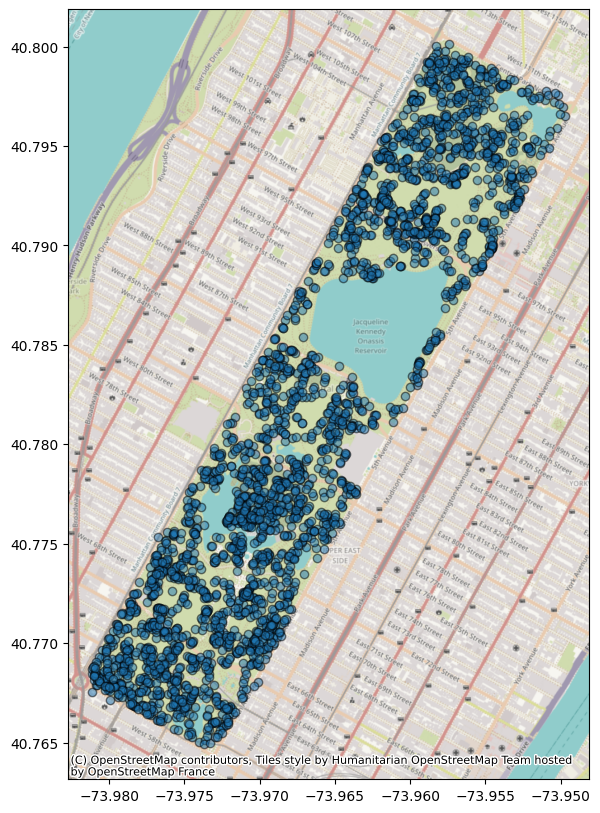

In [62]:
# Plot the map, using the plot method of the dataframe
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs)

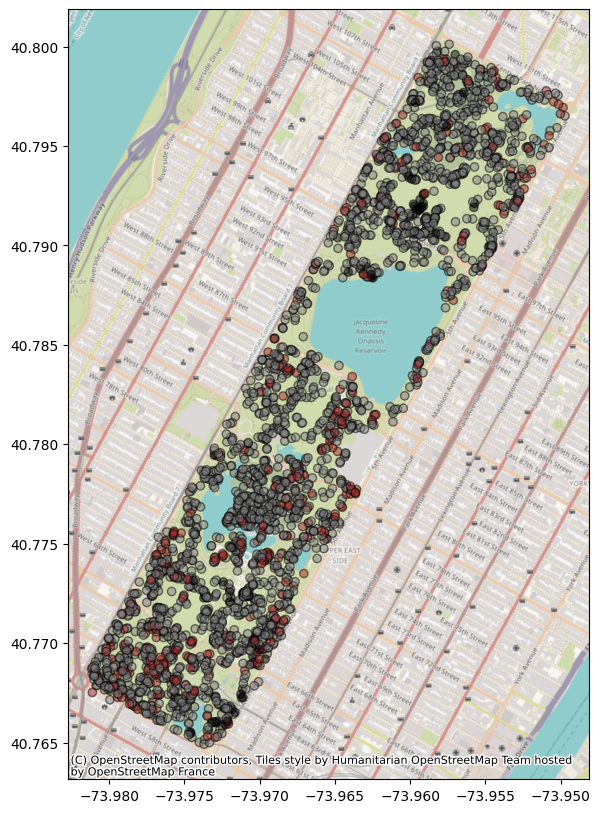

In [63]:
# Make the same map plot, but plot based upon color to get a better idea of where each squirrel lives. 
color_mapping_dict = {'Black': 'black', 'Gray': 'gray', 'Cinnamon': 'brown'}

ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', color=gdf['Primary Fur Color'].map(color_mapping_dict))
ctx.add_basemap(ax, crs=gdf.crs)

## Data Analysis: Correlations and Distributions
Go through some of the columns in the dataset to have a better understanding of how the values are distributed

In [64]:
# Check to see how the Primary color of a squirrel correlates with how whether or not they were sighted above ground
df[df['Location'] == 'Ground Plane']['Primary Fur Color'].value_counts(normalize=True)

Primary Fur Color
Gray        0.829868
Cinnamon    0.136106
Black       0.034026
Name: proportion, dtype: float64

In [65]:
df[df['Location'] == 'Above Ground']['Primary Fur Color'].value_counts(normalize=True)

Primary Fur Color
Gray        0.851720
Cinnamon    0.111507
Black       0.036773
Name: proportion, dtype: float64

In [66]:
# It appears that gray squirrels slightly more proportionally are found above ground than not, Cinnamon squirrels are more likely to be on the ground plane, and that Black squirrels are equally likely to be in both places. 


/var/folders/y9/3n_4xggx67q4b0ldt7wdzt6w0000gn/T/ipykernel_14014/3419049049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Above Ground Sighter Measurement'] = plot_df['Above Ground Sighter Measurement'].astype(int)


<Axes: xlabel='Primary Fur Color'>

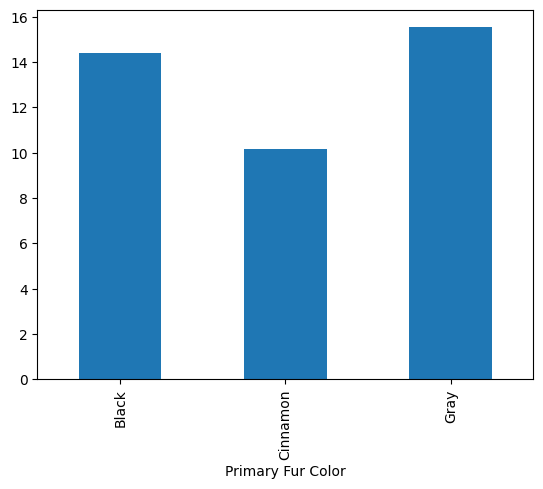

In [67]:
# For the squirrels found above ground, is there a difference in Primary Fur Color as to how high up they were found?
plot_df = df[df['Location'] == 'Above Ground']
plot_df['Above Ground Sighter Measurement'] = plot_df['Above Ground Sighter Measurement'].astype(int)
plot_df = plot_df.groupby(['Primary Fur Color'])['Above Ground Sighter Measurement'].mean()
plot_df.plot.bar(x='Primary Fur Color', y='Above Ground Sighter Measurement')

In [68]:
# We can see that Gray squirrels climb the farthest off the ground, black squirrels the next highest, and Cinnamon squirrels the lowest. 

Currently, the date column is a Text field with the month, day, and year. That information should be translated to a Datetime column, so that it can be correctly used later in the analysis.  

In [69]:
df['Date'] = pd.to_datetime(df['Date'], format="%m%d%Y")

In [70]:
# Now the information is in a usable format for working with dates
df['Date'].head()

2   2018-10-14
4   2018-10-17
6   2018-10-10
7   2018-10-08
8   2018-10-06
Name: Date, dtype: datetime64[ns]

Create some histograms and bar charts to show the distribution of the data

<Axes: xlabel='Shift'>

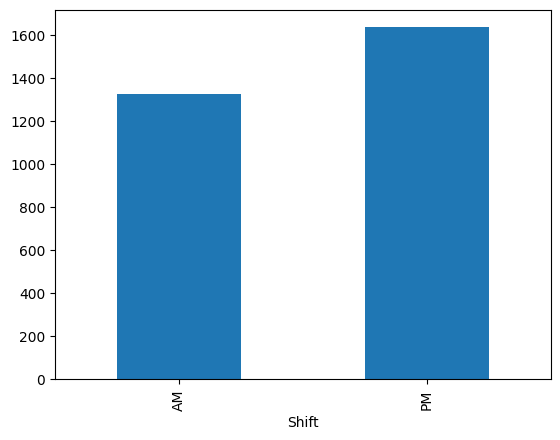

In [71]:
# Distribution of what shift the squirrel sighting occurred during
df.groupby(['Shift'])['Unique Squirrel ID'].count().plot(x='Shift', y='Unique Squirrel ID', kind='bar')

<Axes: >

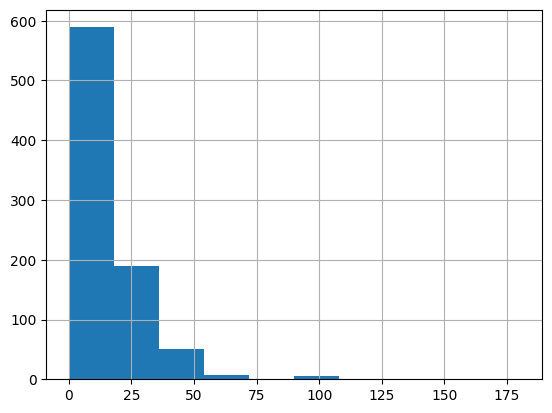

In [72]:
# Distribution of how far above ground the squirrels were found, if they were found above ground
df[df['Above Ground Sighter Measurement'] != 'FALSE']['Above Ground Sighter Measurement'].astype(int).hist()

<Axes: >

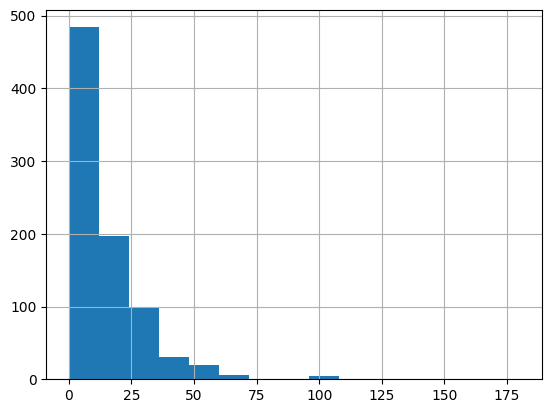

In [73]:
# Plot the same histogram, just with an additional number of bins to show more parts of the data
df[df['Above Ground Sighter Measurement'] != 'FALSE']['Above Ground Sighter Measurement'].astype(int).hist(bins=15)

<Axes: >

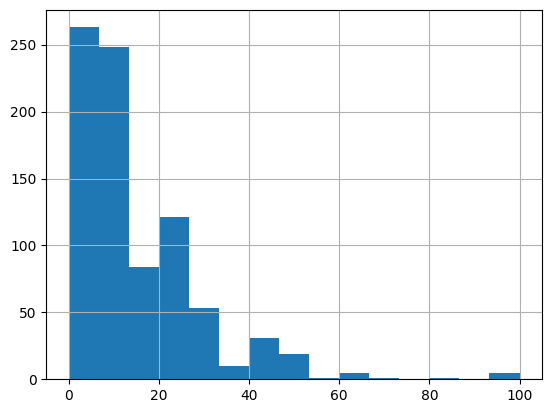

In [74]:
# Remove all values greater than 100 so that we can see more of the data and the way in which the data is stratified where there are more records. 
measurement_series = df[df['Above Ground Sighter Measurement'] != 'FALSE']['Above Ground Sighter Measurement'].astype(int)
measurement_series[measurement_series < 110].hist(bins=15)

<Axes: xlabel='Date'>

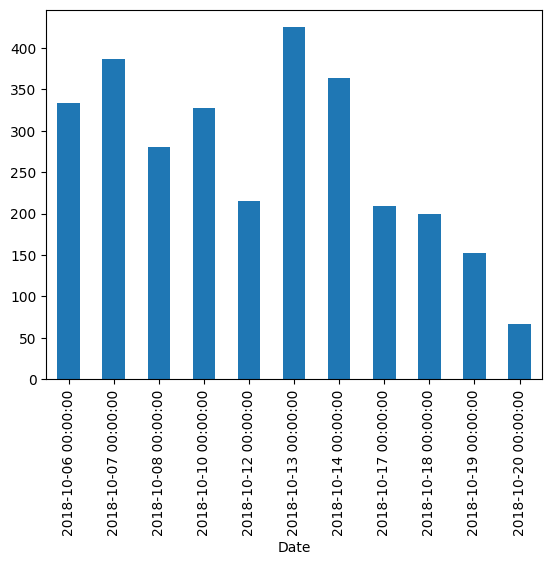

In [75]:
# Distribution of sightings over time
df.groupby(['Date'])['Unique Squirrel ID'].count().plot(x='Date', kind='bar')

Distribution for this attribute: Kuks


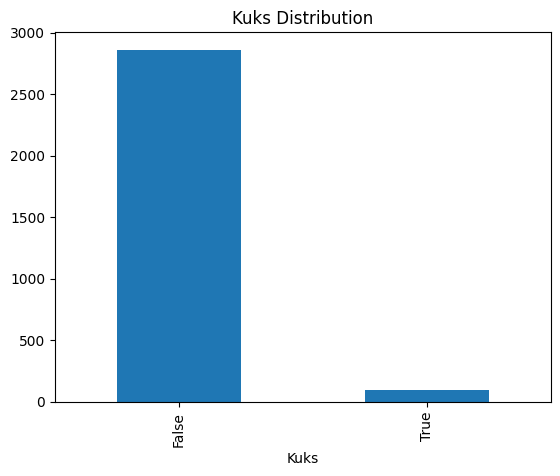

Distribution for this attribute: Quaas


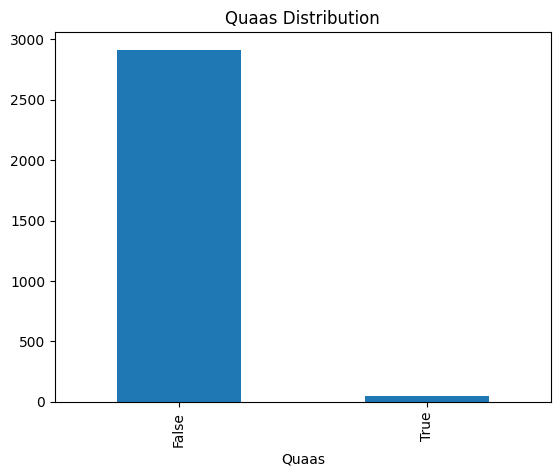

Distribution for this attribute: Moans


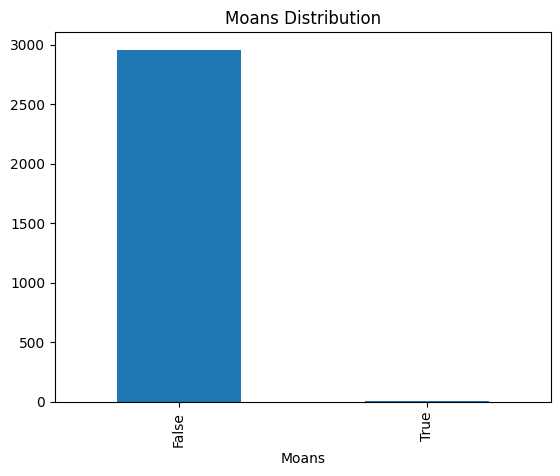

Distribution for this attribute: Tail flags


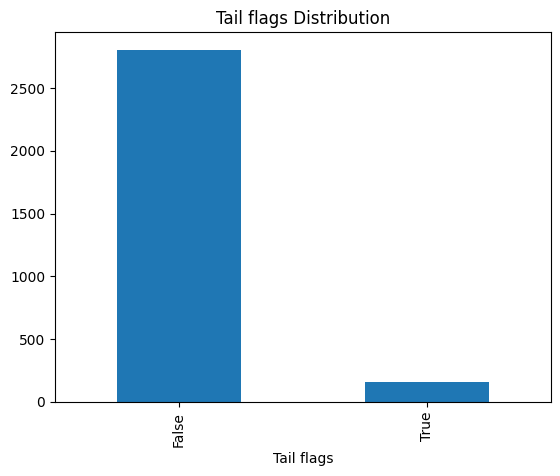

Distribution for this attribute: Tail twitches


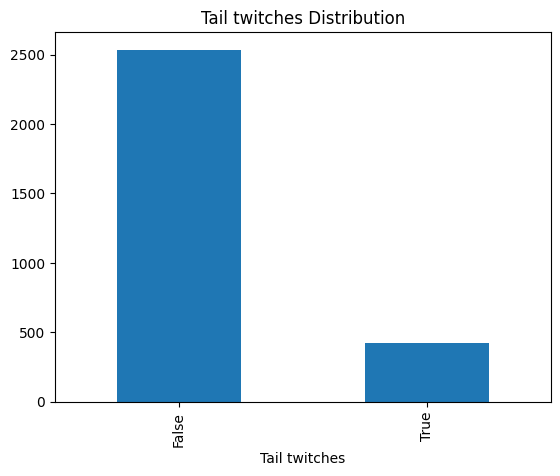

Distribution for this attribute: Approaches


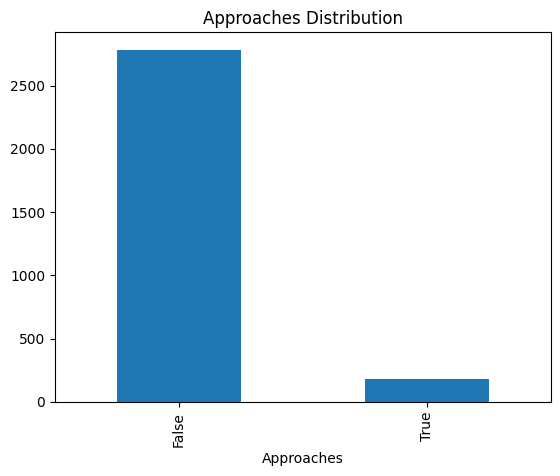

Distribution for this attribute: Indifferent


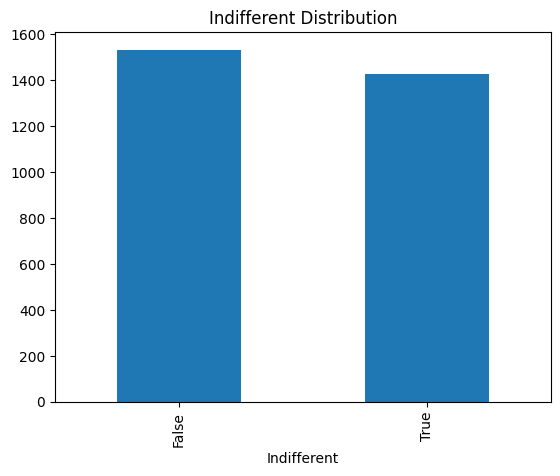

Distribution for this attribute: Runs from


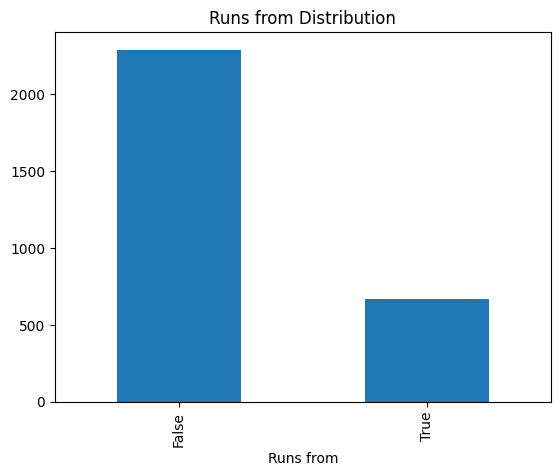

Distribution for this attribute: Running


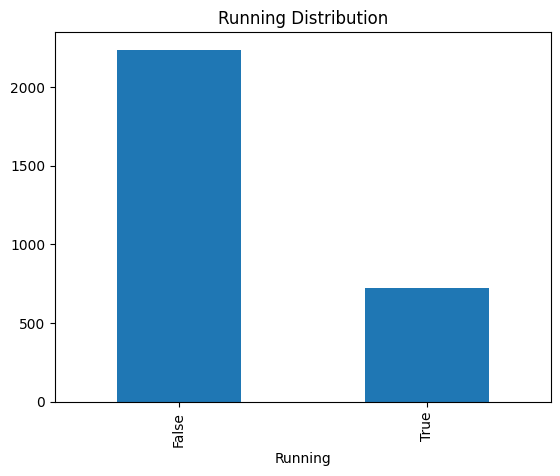

Distribution for this attribute: Chasing


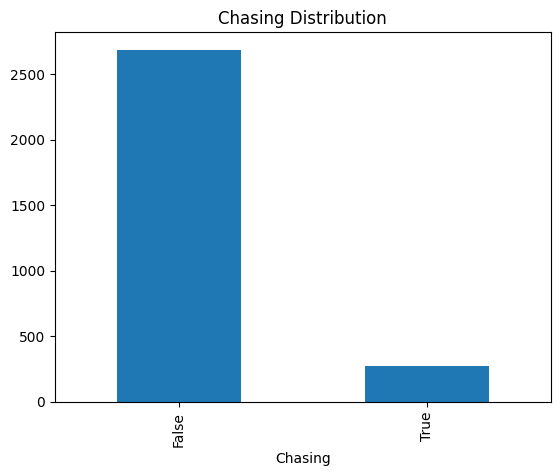

Distribution for this attribute: Climbing


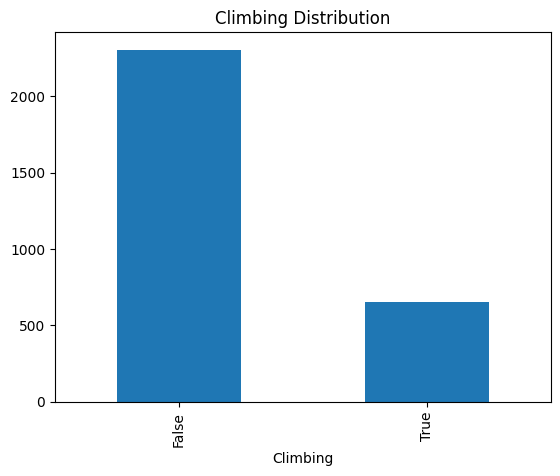

Distribution for this attribute: Foraging


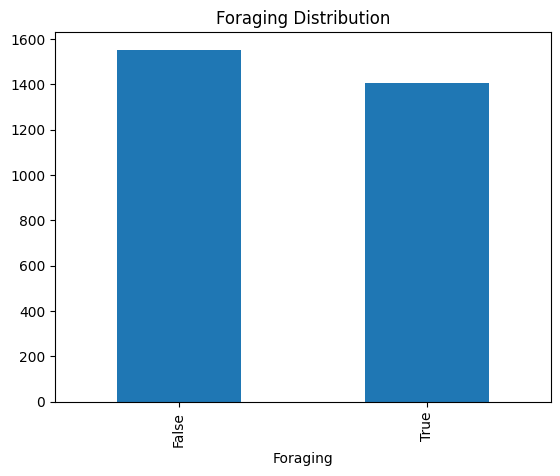

Distribution for this attribute: Eating


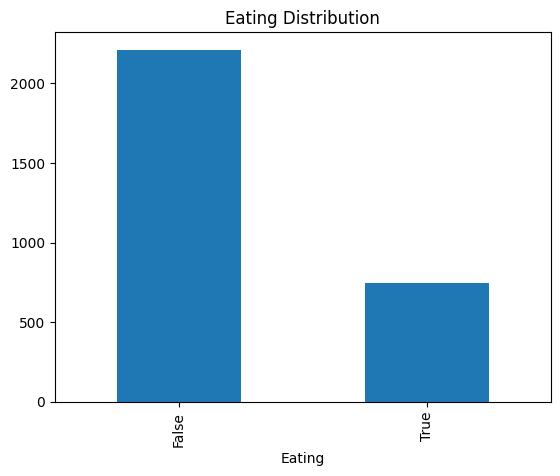

In [76]:
# See the distribution of some of the boolean attributes in the dataset
l = ['Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Running', 'Chasing', 'Climbing', 'Foraging', 'Eating']
for attribute in l:
    print(f'Distribution for this attribute: {attribute}')
    df.groupby([attribute])['Unique Squirrel ID'].count().plot(x=attribute, y='Unique Squirrel ID', kind='bar', title=f'{attribute} Distribution')
    plt.show()

For most of the features above, there is a distribution that tilts towards there being more times where the thing is not happening vs. when it is happening. This shows that most of these attributes are mostly rare in the observations, and that they happen less frequently.

That being said, almost half the squirrels were foraging for food when seen, and half the squirrels were indifferent when approached by a human. These variables happened much more frequently than the rest.  

In [80]:
# Check to see how the dataset looks now that all the transformations have been done
print(f'Total Number of rows: {len(df)}')
df.info()

Total Number of rows: 2959
<class 'pandas.core.frame.DataFrame'>
Index: 2959 entries, 2 to 3022
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   X                                           2959 non-null   float64       
 1   Y                                           2959 non-null   float64       
 2   Unique Squirrel ID                          2959 non-null   object        
 3   Hectare                                     2959 non-null   object        
 4   Shift                                       2959 non-null   object        
 5   Date                                        2959 non-null   datetime64[ns]
 6   Hectare Squirrel Number                     2959 non-null   int64         
 7   Age                                         2959 non-null   object        
 8   Primary Fur Color                           2959 non-null   object

As we can see, there are no more null values for any of the important columns to have a value for. The only columns with null values are Color Notes, Highlight Fur Color, Specific Location, Other Activities, and Other Interactions. As highlighted above, it is appropriate for those columns to have null values in them, as they are all optional columns where there may or may not be information to be stored in them. 